In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# I. Pandas Basics
* [1. Generate DataFrame](#1_1)
* [2. Select Columns](#1_2)
* [3. Select Records](#1_3)
* [4. Modify Dataframes](#1_4)
* [5. Aggregate](#1_5)
* [6. Merge and Concatenate](#1_6)

# II. [Visualization Basics]()

<a name="1_1"></a>
## 1. Generate DataFrame

#### 1. DataFrame by dict

* 데이터 프레임을 생성하기 위해서 pd.DataFrame()을 활용할 수 있습니다.
* 파이썬 dict형태로 인자를 넘겨주면 됩니다.
* **Remarks** : 각 키값에 해당하는 레코드들이 같은 길이를 가지고 있어야 합니다.
* 생성된 데이터 프레임 객체의 메소드 .head(n)를 통해 간단히 데이터 테이블을 미리 볼 수 있습니다.

In [2]:
D = {
    'col1':['a','b','c'],
    'cash':[10000,5000,100]
}
df = pd.DataFrame(D)

In [3]:
df.head()

,col1,cash
0,a,10000
1,b,5000
2,c,100


#### 2. DataFrame by lists

* 각 레코드별로 한 리스트에 넣고, 레코드 Attributes의 길이와 같은 Column이름을 한 리스트에 지정하여 넘겨주면 됩니다.

In [4]:
name = ['a','b','c']
cash = [10000,np.nan,100]
records = list(zip(name,cash))
print(f"zipped records: {records}")

columns = ['col1','cash']

df2 = pd.DataFrame(records , columns=columns)
df2

zipped records: [('a', 10000), ('b', nan), ('c', 100)]


,col1,cash
0,a,10000.0
1,b,NaN
2,c,100.0


#### 3. DataFrame by CSV file

In [5]:
csv_addr = os.path.join('data','train.csv')
df_train = pd.read_csv(csv_addr)

In [6]:
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


##### .info() 메소드를 활용하여 데이터프레임의 좀 더 세부적인 정보들을 확인할 수 있습니다.

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB


<a id="1_2"></a>
## 2. Select columns

#### 1. Select Columns

* df[{col_name}]
* df.col_name

선택하고자 하는 칼럼의 이름이 General rule of variable naming에 맞다면, 클래스의 attribute처럼 선택할 수 있습니다.

다수의 칼럼을 선택하고자 할 시에는 칼럼의 이름들로 하나의 리스트를 만들어 아래와 같이 할 수 있습니다.
```python
cols = ['price', 'date', 'view']
df_train[cols]
```

In [8]:
df_train['price']

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
5         662500.0
6         468000.0
7         310000.0
8         400000.0
9         530000.0
10        650000.0
11        395000.0
12        485000.0
13        189000.0
14        230000.0
15        385000.0
16       2000000.0
17        252700.0
18        329000.0
19        233000.0
20        937000.0
21        667000.0
22        580500.0
23        687500.0
24        535000.0
25        322500.0
26        696000.0
27        640000.0
28        240000.0
29        605000.0
           ...    
15005     330000.0
15006     608500.0
15007     785000.0
15008     610950.0
15009     399950.0
15010     579000.0
15011     362500.0
15012     645000.0
15013     594866.0
15014     490000.0
15015     399950.0
15016     270000.0
15017     505000.0
15018     385000.0
15019     414500.0
15020     347500.0
15021    1222500.0
15022    1088000.0
15023     350000.0
15024     679950.0
15025    1575000.0
15026     81

In [9]:
df_train.price

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
5         662500.0
6         468000.0
7         310000.0
8         400000.0
9         530000.0
10        650000.0
11        395000.0
12        485000.0
13        189000.0
14        230000.0
15        385000.0
16       2000000.0
17        252700.0
18        329000.0
19        233000.0
20        937000.0
21        667000.0
22        580500.0
23        687500.0
24        535000.0
25        322500.0
26        696000.0
27        640000.0
28        240000.0
29        605000.0
           ...    
15005     330000.0
15006     608500.0
15007     785000.0
15008     610950.0
15009     399950.0
15010     579000.0
15011     362500.0
15012     645000.0
15013     594866.0
15014     490000.0
15015     399950.0
15016     270000.0
15017     505000.0
15018     385000.0
15019     414500.0
15020     347500.0
15021    1222500.0
15022    1088000.0
15023     350000.0
15024     679950.0
15025    1575000.0
15026     81

In [10]:
df_train[['view','price']]

,view,price
0,0,221900.0
1,0,180000.0
2,0,510000.0
3,0,257500.0
4,0,291850.0
5,0,662500.0
6,0,468000.0
7,0,310000.0
8,0,400000.0
9,0,530000.0


##### 선택한 칼럼의 갯수에 따른 반환값의 형태를 확인해봅시다.

In [11]:
print(type(df_train.view))
print(type(df_train[['view','price']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


##### numpy Array형태로 값을 반환 받기 위해서는?!
.values

* **Remarks**: 메소드 아님.

In [12]:
print(df_train.view.values)
print(type(df_train.view.values))

[0 0 0 ... 0 0 0]
<class 'numpy.ndarray'>


<a id="1_3"></a>
## 3. Select Records

#### 1. Select Row by index
pandas 데이터프레임에서 레코드에 접근하기 위해서는 [], loc[], .iloc[]를 사용합니다. (.ix[])

In [26]:
print(type(df_train.iloc[5]))
df_train.iloc[5]# 6th row

<class 'pandas.core.series.Series'>


id                             5
date             20150403T000000
price                     662500
bedrooms                       3
bathrooms                    2.5
sqft_living                 3560
sqft_lot                    9796
floors                         1
waterfront                     0
view                           0
condition                      3
grade                          8
sqft_above                  1860
sqft_basement               1700
yr_built                    1965
yr_renovated                   0
zipcode                    98007
lat                      47.6007
long                    -122.145
sqft_living15               2210
sqft_lot15                  8925
Name: 5, dtype: object

In [54]:
df_train.iloc[4:7,6] # data at [4][ b

4    9711
5    9796
6    6000
Name: sqft_lot, dtype: int64

In [56]:
df_train.loc[4:6,['sqft_lot']]

,sqft_lot
4,9711
5,9796
6,6000


##### Slicing 또한 사용 가능합니다.

In [43]:
df_train.iloc[4:7,6:9]

,sqft_lot,floors,waterfront
4,9711,1.0,0
5,9796,1.0,0
6,6000,1.0,0


#### 2. Select by Logic
또한, 데이터프레임에 [] 속에 논리식을 넣어 선택할 수 있습니다.
* | : or
* & : and
* etc.
**Remarks**: 복수개의 논리식을 사용할 때에는 () 괄호를 사용하여 논리식을 구분해 주어야 합니다.

In [44]:
df_train[(df_train.view != 0) & (df_train.view < 4)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10,10,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
40,40,20141210T000000,650000.0,3,2.25,2150,21235,1.0,0,3,...,8,1590,560,1959,0,98166,47.4336,-122.339,2570,18900
67,67,20140516T000000,437500.0,3,2.50,2320,36847,2.0,0,2,...,9,2320,0,1992,0,98045,47.4838,-121.714,2550,35065
76,76,20141124T000000,329950.0,3,1.75,2080,5969,1.0,0,2,...,7,1080,1000,1971,0,98108,47.5474,-122.295,2090,5500
77,77,20141028T000000,480000.0,4,2.50,3230,16171,2.0,0,3,...,9,2520,710,2001,0,98001,47.3183,-122.253,2640,8517
82,82,20150102T000000,660000.0,3,2.50,2400,6474,1.0,0,2,...,8,1560,840,1964,0,98177,47.7728,-122.386,2340,10856
84,84,20140717T000000,445000.0,3,2.25,2100,8201,1.0,0,2,...,8,1620,480,1967,0,98178,47.5091,-122.244,2660,8712
98,98,20150401T000000,2250000.0,4,3.25,5180,19850,2.0,0,3,...,12,3540,1640,2006,0,98006,47.5620,-122.162,3160,9750
124,124,20141121T000000,1095000.0,5,3.00,4090,12850,1.0,0,2,...,10,2090,2000,1986,0,98033,47.6627,-122.188,2540,10270
149,149,20150221T000000,1505000.0,5,3.00,3300,33474,1.0,0,3,...,9,1870,1430,1957,1991,98040,47.5673,-122.210,3836,20953


In [45]:
df_train.loc[df_train.view>2]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10,10,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
16,16,20140826T000000,2000000.0,3,2.75,3050,44867,1.0,0,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
39,39,20140827T000000,951000.0,5,3.25,3250,14342,2.0,0,4,...,8,3250,0,1968,0,98008,47.5880,-122.116,2960,11044
40,40,20141210T000000,650000.0,3,2.25,2150,21235,1.0,0,3,...,8,1590,560,1959,0,98166,47.4336,-122.339,2570,18900
77,77,20141028T000000,480000.0,4,2.50,3230,16171,2.0,0,3,...,9,2520,710,2001,0,98001,47.3183,-122.253,2640,8517
98,98,20150401T000000,2250000.0,4,3.25,5180,19850,2.0,0,3,...,12,3540,1640,2006,0,98006,47.5620,-122.162,3160,9750
149,149,20150221T000000,1505000.0,5,3.00,3300,33474,1.0,0,3,...,9,1870,1430,1957,1991,98040,47.5673,-122.210,3836,20953
150,150,20140828T000000,1072000.0,2,2.25,3900,14864,1.0,0,3,...,8,1950,1950,1947,0,98144,47.5884,-122.291,2580,5184
160,160,20150413T000000,655000.0,2,1.75,1450,15798,2.0,1,4,...,7,1230,220,1915,1978,98166,47.4497,-122.375,2030,13193
174,174,20140929T000000,2400000.0,4,2.50,3650,8354,1.0,1,4,...,9,1830,1820,2000,0,98074,47.6338,-122.072,3120,18841


In [57]:
dfA = df_train[(df_train.view != 0) & (df_train.view < 4)]
dfB = df_train.loc[(df_train.view != 0) & (df_train.view < 4)]

In [58]:
print(type(dfA), type(dfB))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


#### 3. Select Indices
위 조건식 맨 앞의 인덱스를 확인해보시면, 조건식에 따라 선택되었기 때문에, 연속적인 값이 아닙니다. 데이터 프레임을 부분집합으로 새로 구성하고자 할 때, 인덱스를 다시 매길 수 있습니다.

In [20]:
dfC = dfA
dfC.reset_index(drop = False, inplace = True)
dfC.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10,10,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
1,40,40,20141210T000000,650000.0,3,2.25,2150,21235,1.0,0,...,8,1590,560,1959,0,98166,47.4336,-122.339,2570,18900
2,67,67,20140516T000000,437500.0,3,2.50,2320,36847,2.0,0,...,9,2320,0,1992,0,98045,47.4838,-121.714,2550,35065
3,76,76,20141124T000000,329950.0,3,1.75,2080,5969,1.0,0,...,7,1080,1000,1971,0,98108,47.5474,-122.295,2090,5500
4,77,77,20141028T000000,480000.0,4,2.50,3230,16171,2.0,0,...,9,2520,710,2001,0,98001,47.3183,-122.253,2640,8517


##### 이전 인덱스들이 index라는 칼럼으로 새로 생성되어 추가된 것을 알 수 있습니다. 이를 없애기 위해서는 `drop = True` 로 주면 됩니다.
##### inplace를 통해 반환값만 주는 것에서 더해 데이터프레임자체를 변경시킬 수 있습니다.

In [59]:
dfD = dfB
dfE=dfD.reset_index(drop = False, inplace = False)
dfD.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10,10,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
40,40,20141210T000000,650000.0,3,2.25,2150,21235,1.0,0,3,...,8,1590,560,1959,0,98166,47.4336,-122.339,2570,18900
67,67,20140516T000000,437500.0,3,2.50,2320,36847,2.0,0,2,...,9,2320,0,1992,0,98045,47.4838,-121.714,2550,35065
76,76,20141124T000000,329950.0,3,1.75,2080,5969,1.0,0,2,...,7,1080,1000,1971,0,98108,47.5474,-122.295,2090,5500
77,77,20141028T000000,480000.0,4,2.50,3230,16171,2.0,0,3,...,9,2520,710,2001,0,98001,47.3183,-122.253,2640,8517


In [61]:
dfE.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10,10,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
1,40,40,20141210T000000,650000.0,3,2.25,2150,21235,1.0,0,...,8,1590,560,1959,0,98166,47.4336,-122.339,2570,18900
2,67,67,20140516T000000,437500.0,3,2.50,2320,36847,2.0,0,...,9,2320,0,1992,0,98045,47.4838,-121.714,2550,35065
3,76,76,20141124T000000,329950.0,3,1.75,2080,5969,1.0,0,...,7,1080,1000,1971,0,98108,47.5474,-122.295,2090,5500
4,77,77,20141028T000000,480000.0,4,2.50,3230,16171,2.0,0,...,9,2520,710,2001,0,98001,47.3183,-122.253,2640,8517


<a id="1_4"></a>
## 4. Modify Dataframes
데이터 프레임을 조작할 때 많은 경우 칼럼 단위로 조작하게 됩니다. 이에 대해 알아봅시다.

#### 1. Add a column
사전에 새로운 키값에 새로운 값을 넣어주듯이 새로운 Column을 DataFrame에 추가시킬 수 있습니다.

In [62]:
len_df = df_train.shape[0]
print("Shape of dataframe: {}".format(df_train.shape))
random_noise = np.random.randn(len_df,1)
df_train['Gaussian_noise'] = random_noise
df_train.head()

Shape of dataframe: (15035, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Gaussian_noise
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0.670821
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,-0.689267
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,-0.093926
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,1.552001
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,-0.210725


In [63]:
df_train.gauss = random_noise

/home/son/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


#### 2. with a single value
한 값만을 가지고 있는 column 역시 쉽게 추가시킬 수 있습니다.

In [64]:
df_train["단일 값으로 생성"]= 'Hello Pandas'
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Gaussian_noise,단일 값으로 생성
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,0.670821,Hello Pandas
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,-0.689267,Hello Pandas
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,-0.093926,Hello Pandas
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,0,1995,0,98003,47.3097,-122.327,2238,6819,1.552001,Hello Pandas
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,0,1963,0,98198,47.4095,-122.315,1650,9711,-0.210725,Hello Pandas


#### 3. Add a column with manipulating with others
다른 column들을 조작하며 추가시킬 수도 있습니다.

In [65]:
df_train['sqft_sum']=df_train.sqft_living15 + df_train.sqft_lot15
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Gaussian_noise,단일 값으로 생성,sqft_sum
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,0.670821,Hello Pandas,6990
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,-0.689267,Hello Pandas,10782
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,-0.093926,Hello Pandas,9303
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,1995,0,98003,47.3097,-122.327,2238,6819,1.552001,Hello Pandas,9057
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,1963,0,98198,47.4095,-122.315,1650,9711,-0.210725,Hello Pandas,11361


#### 4. Apply custom function to each data in a coulmn
람다 함수 등을 선언하여 파이썬 map 함수처럼 column에 적용할 수 있습니다.

이 때 사용하는 method가 .apply()입니다.

##### i. Apply lambda function into a column

In [66]:
df_train['NewColumnByLambda'] = df_train['long'].apply(lambda x: abs(x)+100)

In [67]:
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Gaussian_noise,단일 값으로 생성,sqft_sum,NewColumnByLambda
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,0.670821,Hello Pandas,6990,222.257
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,-0.689267,Hello Pandas,10782,222.233
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,-0.093926,Hello Pandas,9303,222.045
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,0,98003,47.3097,-122.327,2238,6819,1.552001,Hello Pandas,9057,222.327
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,0,98198,47.4095,-122.315,1650,9711,-0.210725,Hello Pandas,11361,222.315


##### ii. Apply lambda function using rows
axis = 1을 추가하여 넘겨줌을 통해 row에 적용할 수 있습니다.

In [68]:
lambda_fn = lambda row : row['lat'] + row['long']
df_train['NewColumnByRows'] = df_train.apply(lambda_fn, axis=1)
# DataFrame에서 .apply()를 호출하였습니다.

In [69]:
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,Gaussian_noise,단일 값으로 생성,sqft_sum,NewColumnByLambda,NewColumnByRows
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,0.670821,Hello Pandas,6990,222.257,-74.7458
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,-0.689267,Hello Pandas,10782,222.233,-74.4951
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,-0.093926,Hello Pandas,9303,222.045,-74.4282
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,98003,47.3097,-122.327,2238,6819,1.552001,Hello Pandas,9057,222.327,-75.0173
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,98198,47.4095,-122.315,1650,9711,-0.210725,Hello Pandas,11361,222.315,-74.9055


#### 5. .drop()

.drop() 메소드를 통해서 원하는 row 또는 column을 DataFrame에서 제거할 수 있습니다.
* row 제거: `df.drop([1,6,3])`
* col 제거: `df.drop(['col1','col2'],axis=1)`

In [76]:
df_train.drop([1,6])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,Gaussian_noise,단일 값으로 생성,sqft_sum,NewColumnByLambda,NewColumnByRows
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,0.670821,Hello Pandas,6990,222.257,-74.7458
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,-0.093926,Hello Pandas,9303,222.045,-74.4282
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,98003,47.3097,-122.327,2238,6819,1.552001,Hello Pandas,9057,222.327,-75.0173
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,98198,47.4095,-122.315,1650,9711,-0.210725,Hello Pandas,11361,222.315,-74.9055
5,5,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,...,98007,47.6007,-122.145,2210,8925,-0.451391,Hello Pandas,11135,222.145,-74.5443
7,7,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,98028,47.7558,-122.229,1780,12697,-1.135869,Hello Pandas,14477,222.229,-74.4732
8,8,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,98074,47.6127,-122.045,1370,10208,0.343531,Hello Pandas,11578,222.045,-74.4323
9,9,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,98107,47.6700,-122.394,1360,4850,-2.034102,Hello Pandas,6210,222.394,-74.7240
10,10,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3,...,98126,47.5714,-122.375,2140,4000,0.040685,Hello Pandas,6140,222.375,-74.8036
11,11,20140731T000000,395000.0,3,2.00,1890,14040,2.0,0,0,...,98019,47.7277,-121.962,1890,14018,0.354330,Hello Pandas,15908,221.962,-74.2343


* 해당사항이 적용된 DataFrame을 반환하지만, 원래의 DataFrame이 변하지는 않습니다. 반환값 없이 적용하기 위해서는 inplace = True로 넘겨주면 됩니다.

In [85]:
df_train.drop(['date','단일 값으로 생성'], axis=1, inplace=True)

In [86]:
df_train.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Gaussian_noise,sqft_sum,NewColumnByLambda,NewColumnByRows
0,0,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,0.670821,6990,222.257,-74.7458
1,1,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,-0.689267,10782,222.233,-74.4951
2,2,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,-0.093926,9303,222.045,-74.4282
3,3,257500.0,3,2.25,1715,6819,2.0,0,0,3,...,0,98003,47.3097,-122.327,2238,6819,1.552001,9057,222.327,-75.0173
4,4,291850.0,3,1.50,1060,9711,1.0,0,0,3,...,0,98198,47.4095,-122.315,1650,9711,-0.210725,11361,222.315,-74.9055


<a name="1_5"></a>
## 5. Aggregates
특정한 column을 대표할만 한 숫자를 뽑아내는 것을 Aggregate라고 이해할 수 있습니다.
$Aggregate : column -> R$

###### 아래와 같은 예들이 있습니다.
 * mean
 * std
 * median
 * max
 * min
 * count
 * nunique
 * unique

In [87]:
df_train.Gaussian_noise.mean()

0.002925226890097753

DataFrame에 적용하면 칼럼별로 적용된 값을 얻을 수 있습니다.

In [88]:
df_train.mean()

id                     7517.000000
price                540682.653143
bedrooms                  3.369139
bathrooms                 2.115065
sqft_living            2083.790223
sqft_lot              15296.965813
floors                    1.498071
waterfront                0.007117
view                      0.234253
condition                 3.406651
grade                     7.660725
sqft_above             1794.158164
sqft_basement           289.632059
yr_built               1971.100432
yr_renovated             83.798936
zipcode               98078.031726
lat                      47.560721
long                   -122.213677
sqft_living15          1992.754772
sqft_lot15            12823.884935
Gaussian_noise            0.002925
sqft_sum              14816.639707
NewColumnByLambda       222.213677
NewColumnByRows         -74.652956
dtype: float64

#### 1. .groupby()
groupby를 활용하여 특정한 columns에 있는 내용을 그룹화하여 Aggregate 할 수 있습니다.

In [89]:
df_train.groupby('bedrooms').min()

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Gaussian_noise,sqft_sum,NewColumnByLambda,NewColumnByRows
bedrooms,,,,,,,,,,,,,,,,,,,,,
0,6885,142000.0,0.00,290,4800,1.0,0,0,1,1,...,0,98024,47.4177,-122.491,1060,4675,-1.063269,6175,221.826,-75.0733
1,246,80000.0,0.00,380,638,1.0,0,0,1,3,...,0,98001,47.2082,-122.472,800,788,-2.430100,2008,221.315,-75.0240
2,1,78000.0,0.50,540,600,1.0,0,0,1,4,...,0,98001,47.1936,-122.511,620,659,-3.053498,1748,221.316,-75.1199
3,0,89000.0,0.75,490,572,1.0,0,0,1,5,...,0,98001,47.1559,-122.519,399,651,-3.486002,1721,221.315,-75.1713
4,10,100000.0,0.75,800,520,1.0,0,0,1,5,...,0,98001,47.1647,-122.490,840,660,-3.698134,1880,221.691,-75.1104
5,9,133000.0,1.00,1170,1989,1.0,0,0,3,5,...,0,98001,47.1776,-122.507,460,1224,-4.233305,2564,221.718,-75.0852
6,168,230000.0,1.00,1370,2760,1.0,0,0,2,5,...,0,98001,47.2668,-122.408,1020,1099,-3.908108,2393,221.869,-75.0398
7,411,280000.0,1.50,1940,2400,1.0,0,0,3,6,...,0,98007,47.3191,-122.392,1240,3825,-1.315307,5165,221.986,-74.9037
8,4362,340000.0,2.50,2280,3000,1.0,0,0,3,7,...,0,98004,47.4786,-122.363,1380,3000,-1.483486,4610,222.131,-74.6898


위의 dataframe을 보면 bedrooms 으로 인덱스로 그룹화 된 것을 알 수 있습니다. 다시 말해, bedrooms 에 속한 data를 같은 것 끼리 묶은 다음 Aggretate하는 것입니다. 두개 이상의 columns을 이용해서 groupby하면 data들의 조합으로 그룹들이 만들어지게 됩니다.

In [90]:
df_train.groupby(['bedrooms','bathrooms']).max()

id      price  sqft_living  sqft_lot  floors  \
bedrooms bathrooms                                                    
0        0.00       13522   235000.0         1470     20875     2.0   
         0.75       12781   265000.0          384    213444     1.0   
         2.50        8826   320000.0         1490      7111     2.0   
1        0.00        7322   484000.0          690     24501     1.0   
         0.50        8137   255000.0          880      1642     1.0   
         0.75       13927   325000.0         1040     87120     1.5   
         1.00       14826   655000.0         2880    533610     2.0   
         1.25       14991   516500.0         1100       638     3.0   
         1.50       14909   550000.0         1900     44866     3.0   
         1.75        9462   390000.0         1440     20339     1.0   
         2.00       14965   420000.0         3000    204732     2.5   
         2.25        3674   611900.0         1220      2100     2.0   
         2.50        9885   680000.0         1980      7521     2.0   
2        0.50        7283   273000.0         1180      7750     1.0   
         0.75       15034   785000.0         1440     55764     2.0   
         1.00       15015   998500.0         2550    423838     3.0   
         1.25       14629   540000.0         1230      1569     2.0   
         1.50       15019  1057000.0         2730    209959     3.0   
         1.75       14837  1360000.0         3490    426450     3.0   
         2.00       14995  1087500.0         2930    641203     3.0   
         2.25       14977  1695000.0         3950    108900     3.0   
         2.50       15017  1998000.0         3900    920423     3.5   
         2.75       14955  1899000.0         3690     32044     3.5   
         3.00       14776  1046250.0         3160     66646     3.0   
         3.25       13524  1365000.0         3570    392475     3.0   
         3.50       13436   535000.0         2560      5000     1.0   
3        0.75       12517   385000.0         1420     72309     1.5   
         1.00       14808  1300000.0         3180    389126     2.5   
         1.25       12969  1388000.0         2400      6653     3.0   
         1.50       14984  1465000.0         3430    349351     3.0   
...                   ...        ...          ...       ...     ...   
6        5.00       14575  3200000.0         7100    230652     2.5   
         5.25       14475  1275000.0         6160     27490     2.0   
         6.00         947  5300000.0         7390     24829     2.0   
         7.75        6469  6885000.0         9890     31374     2.0   
         8.00        5108  7700000.0        12050     27600     2.5   
7        1.50        6381   575000.0         2670     15111     1.5   
         2.25       13081   770000.0         3260      8145     2.0   
         2.50       11369   280000.0         1940      5458     2.0   
         2.75       12039   750000.0         3410      4400     1.5   
         3.00        9772  2885000.0         5350     14400     2.5   
         3.25        9148   419000.0         4340      8521     2.0   
         3.50       11658  1950000.0         4640     29699     2.0   
         4.00        7181   999000.0         3150     34830     2.0   
         4.25       10476  2450000.0         4670     23115     2.0   
         4.75        2646   884900.0         5370     10800     1.5   
         5.75       10992   540000.0         3700      7647     2.0   
         6.75        2859   800000.0         7480     41664     2.0   
         8.00        8912  2280000.0        13540    307752     3.0   
8        2.50        6343   700000.0         2280      3000     1.5   
         2.75       10938  1650000.0         4040     20666     2.0   
         3.00       13407   575000.0         3840     15990     1.0   
         3.25       10510   430000.0         4300     10441     2.0   
         3.50       11973  1970000.0         4440      6480     2.0   
         3.75        8987   808000.0         34

Groupby를 통해 Aggregate된 Dataframe의 column을 선택하여 .apply를 적용시킬 수도 있습니다.
예를들어 밑의 예는 
df_train안에 있는 bedrooms column에 들어있는 값들을 종류별로 그룹화하여 median값을 나타내는 dataframe을 새로 만들고, 이 dataframe의 bathrooms에 해당 lambda 함수를 적용한 것입니다.

In [91]:
grouped_lambda_apply = df_train.groupby('bedrooms').median().bathrooms.apply(lambda x:3 if x<1 else 7)

In [92]:
grouped_lambda_apply

bedrooms
0     3
1     7
2     7
3     7
4     7
5     7
6     7
7     7
8     7
9     7
10    7
Name: bathrooms, dtype: int64

<a name="1_6"></a>
## 6. Merge and Concatenate

#### 1. Inner Merge

In [93]:
D = {
   "id" : [1,2,3,4,5],
    "food":["순댓국밥","파스타","짜장면","스테이크","라면"]
}
df1 = pd.DataFrame(D)
a = [1,3,5]
b = ["할매", "공화춘", "농심"]
df2 = pd.DataFrame(zip(a,b),columns=["id","company"])

In [94]:
df1

,id,food
0,1,순댓국밥
1,2,파스타
2,3,짜장면
3,4,스테이크
4,5,라면


In [95]:
df2

,id,company
0,1,할매
1,3,공화춘
2,5,농심


In [96]:
merged_df = pd.merge(df1, df2)
merged_df

,id,food,company
0,1,순댓국밥,할매
1,3,짜장면,공화춘
2,5,라면,농심


In [98]:
df3 = pd.DataFrame(zip(a,b),columns=["id2","com"])
df3

,id2,com
0,1,할매
1,3,공화춘
2,5,농심


In [99]:
merged_df2 = pd.merge(df1, df3, left_on="id", right_on="id2")
merged_df2

,id,food,id2,com
0,1,순댓국밥,1,할매
1,3,짜장면,3,공화춘
2,5,라면,5,농심


In [102]:
df3 = pd.DataFrame(zip(a,b),columns=["id2","food"])
merged_df2 = pd.merge(df1, df3, left_on="id", right_on="id2", suffixes=['_df1','_df3'])
merged_df2

,id,food_df1,id2,food_df3
0,1,순댓국밥,1,할매
1,3,짜장면,3,공화춘
2,5,라면,5,농심


In [105]:
df1.merge(df2)

,id,food,company
0,1,순댓국밥,할매
1,3,짜장면,공화춘
2,5,라면,농심


#### 2. outer merge

In [106]:
pd.merge(df1, df2, how="outer")

,id,food,company
0,1,순댓국밥,할매
1,2,파스타,NaN
2,3,짜장면,공화춘
3,4,스테이크,NaN
4,5,라면,농심


In [107]:
pd.merge(df1, df2, how="left")

,id,food,company
0,1,순댓국밥,할매
1,2,파스타,NaN
2,3,짜장면,공화춘
3,4,스테이크,NaN
4,5,라면,농심


In [108]:
pd.merge(df1, df2, how="right")

,id,food,company
0,1,순댓국밥,할매
1,3,짜장면,공화춘
2,5,라면,농심


#### 3. pd.concat & pd.join

In [118]:
pd.concat([df1,df2])

/home/son/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,company,food,id
0,NaN,순댓국밥,1
1,NaN,파스타,2
2,NaN,짜장면,3
3,NaN,스테이크,4
4,NaN,라면,5
0,할매,NaN,1
1,공화춘,NaN,3
2,농심,NaN,5


In [119]:
pd.concat([df1,df2],axis=1)

,id,food,id,company
0,1,순댓국밥,1.0,할매
1,2,파스타,3.0,공화춘
2,3,짜장면,5.0,농심
3,4,스테이크,NaN,NaN
4,5,라면,NaN,NaN


In [128]:
df1.join(df2,lsuffix='_l',rsuffix='_r')

,id_l,food,id_r,company
0,1,순댓국밥,1.0,할매
1,2,파스타,3.0,공화춘
2,3,짜장면,5.0,농심
3,4,스테이크,NaN,NaN
4,5,라면,NaN,NaN


# Problem

# II. Visualization
1. seaborn
2. matplotlib.pyplot

## 1. Seaborn
Seaborn은 pandas의 DataFrame곽 함께 사용되는 데에 최적화되어 있습니다. 

* relplot (Relational plot)
    * scatterplot()
    * lineplot()
    
* catplot (Categorical plot)
    - i. scatter plot
        * stripplot() default
        * swarmplot()
    - ii. distribution plot
        * boxplot()
        * violinplot()
        * boxenplot()
    - iii. estimate plot
        * pointplot()
        * barplot()
        * countplot()
        
* visualize data distribution
    * distplot()
    * kdeplot()
    * jointplot()
    * rugplot()
    * pairplot()

In [129]:
for column in df_train.columns:
    num_col=len(pd.unique(df_train[column]))
    print(f"{column:20}: {num_col}")

id                  : 15035
price               : 3263
bedrooms            : 11
bathrooms           : 29
sqft_living         : 863
sqft_lot            : 7678
floors              : 6
waterfront          : 2
view                : 5
condition           : 5
grade               : 12
sqft_above          : 789
sqft_basement       : 271
yr_built            : 116
yr_renovated        : 65
zipcode             : 70
lat                 : 4692
long                : 716
sqft_living15       : 682
sqft_lot15          : 6958
Gaussian_noise      : 15035
sqft_sum            : 8131
NewColumnByLambda   : 716
NewColumnByRows     : 8080


#### 1. relplot (Relational plot)

#### i. scatterplot()

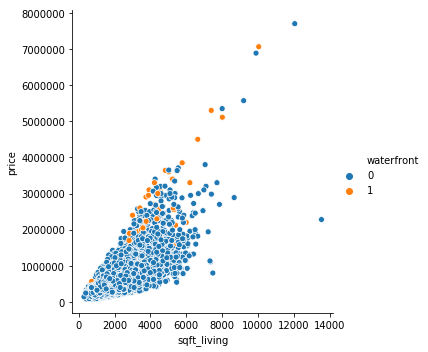

In [130]:
sns.relplot(x='sqft_living', y="price", kind='scatter',hue="waterfront",data=df_train)

In [ ]:
# sns.relplot(x='sqft_living', y="price", kind='scatter',hue="waterfront",size="grade",style="floors",data=df_train)

#### ii. lineplot()

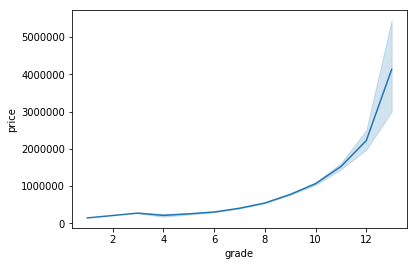

In [131]:
sns.lineplot(data=df_train, x="grade", y="price")

In [132]:
df_train.groupby("grade").count()["id"]

grade
1        1
3        2
4       23
5      174
6     1406
7     6228
8     4207
9     1855
10     781
11     288
12      61
13       9
Name: id, dtype: int64

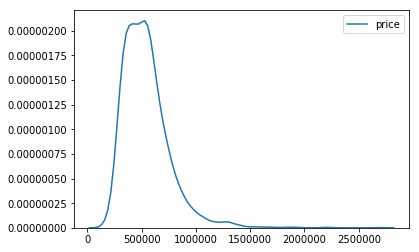

In [133]:
a= df_train.loc[df_train["grade"] == 8]["price"]
sns.kdeplot(a)

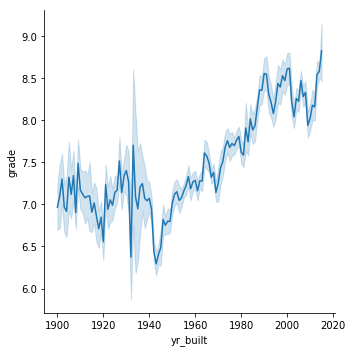

In [134]:
sns.relplot(x="yr_built", y="grade", kind='line', ci=95, data=df_train)

#### 2. Categorical Plot

#### i. Bar plot

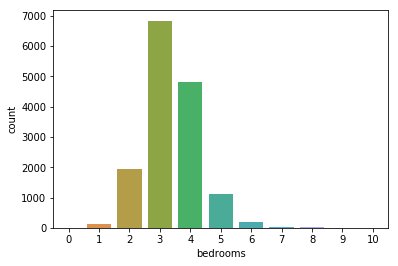

In [135]:
sns.countplot(x = "bedrooms", data=df_train)

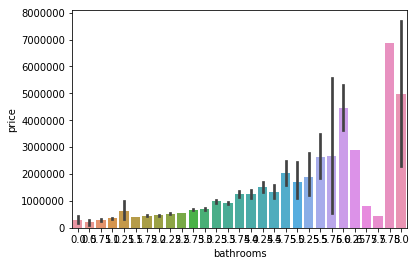

In [136]:
sns.barplot(x="bathrooms", y="price", data=df_train)

#### iii. box plot

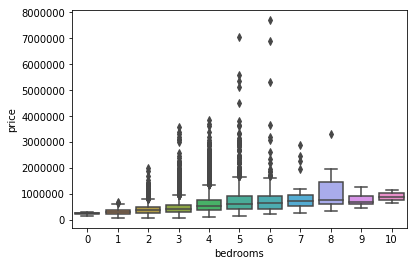

In [137]:
sns.boxplot(x="bedrooms", y="price", data=df_train)

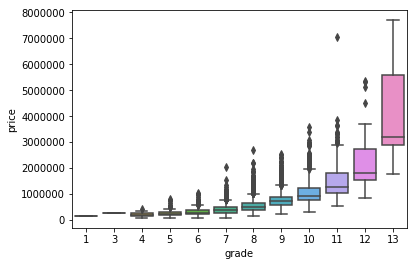

In [138]:
sns.boxplot(x="grade", y="price", data=df_train)

#### iv. Violin plot (box + kde plot)
* white point in the center: median
* Thick black bar: interquartile range
* Thin black bar: confidence interval
* Shaded area: KDE

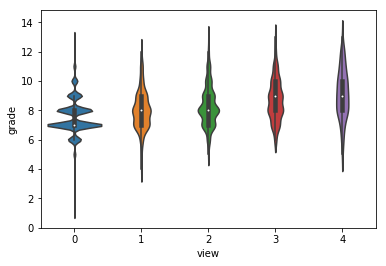

In [139]:
sns.violinplot(x="view" ,y="grade",data=df_train)

#### 3. Data distribution

#### ii. kde plot (kernel density estimator)

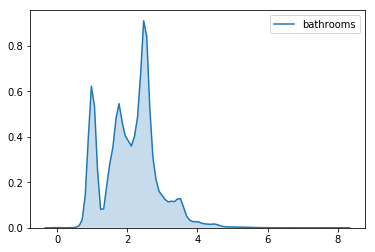

In [140]:
sns.kdeplot(df_train["bathrooms"], shade=True)

#### Joint Plot

#### FacetGrid

#### Pairplot

#### 2. Styling

sns.set_style()을 통해 built-in themes를 활용할 수 있습니다.

1. darkgrid
2. whitegrid
3. dark
4. white
5. ticks

#### i. built-in style

In [ ]:
sns.set_style('whitegrid')

In [ ]:
sns.violinplot(x="view" ,y="grade",data=df_train)

#### ii. despine

In [ ]:
sns.violinplot(x="view" ,y="grade",data=df_train)
sns.despine(left=False, right= False)

#### iii. Scaling
1. paper
2. notebook
3. talk
4. poster


* 명확한 차이 설명!!!

In [ ]:
sns.set_context("notebook", font_scale=1.5, rc={"grid.linewidth":1})

In [ ]:
sns.violinplot(x="view" ,y="grade",data=df_train)

#### iv. color
* sns.set.color_palette()
* sns.palplot()
* set_palette()

* color palettes
 1. deep
 2. muted
 3. pastel
 4. bright
 5. dark
 6. colorblind

In [ ]:
palette = sns.color_palette("bright")
sns.palplot(palette)
sns.set_palette(palette)

In [ ]:
sns.kdeplot(df_train["bathrooms"], shade=True)

#### 2. Styling

sns.set_style()을 통해 built-in themes를 활용할 수 있습니다.

1. darkgrid
2. whitegrid
3. dark
4. white
5. ticks

#### i. built-in style

In [ ]:
sns.set_style('whitegrid')

In [ ]:
sns.violinplot(x="view" ,y="grade",data=df_train)

#### ii. despine

In [ ]:
sns.violinplot(x="view" ,y="grade",data=df_train)
sns.despine(left=False, right= False)

#### iii. Scaling
1. paper
2. notebook
3. talk
4. poster


* 명확한 차이 설명!!!

In [ ]:
sns.set_context("notebook", font_scale=1.5, rc={"grid.linewidth":1})

In [ ]:
sns.violinplot(x="view" ,y="grade",data=df_train)

#### iv. color
* sns.set.color_palette()
* sns.palplot()
* set_palette()

* color palettes
 1. deep
 2. muted
 3. pastel
 4. bright
 5. dark
 6. colorblind

In [ ]:
palette = sns.color_palette("bright")
sns.palplot(palette)
sns.set_palette(palette)

In [ ]:
sns.kdeplot(df_train["bathrooms"], shade=True)